In [1]:
from seir_models import *
from seir_utils import *
import numpy as np
np.random.seed(42)

In [2]:
# === LOAD DATA ===
filepath = "epi_data_comparison/simulation_outputs/normal/output_luxembourg.csv"
initial_conditions, observed = extract_initial_conditions_and_observed(filepath)


In [3]:
times = np.arange(len(observed))

Maximising LogPDF
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 7
Iter. Eval. Best      Current   Time    
0     7     -8.94e+09 -8.94e+09   0:00.0
1     14    -3.24e+09 -3.24e+09   0:00.0
2     21    -3.24e+09 -4.08e+09   0:00.0
3     28    -3.24e+09 -3.54e+09   0:00.0
20    147   -3.08e+08 -4.12e+08   0:00.1
40    287   -2.72e+08 -2.73e+08   0:00.2
60    427   -2.72e+08 -2.72e+08   0:00.2
80    567   -2.72e+08 -2.72e+08   0:00.3
100   707   -2.72e+08 -2.72e+08   0:00.4
120   847   -2.72e+08 -2.72e+08   0:00.5
140   987   -2.72e+08 -2.72e+08   0:00.6
160   1127  -2.72e+08 -2.72e+08   0:00.6
180   1267  -2.72e+08 -2.72e+08   0:00.7
200   1407  -2.72e+08 -2.72e+08   0:00.8
220   1547  -2.72e+08 -2.72e+08   0:00.9
240   1687  -2.72e+08 -2.72e+08   0:00.9
260   1827  -2.72e+08 -2.72e+08   0:01.0
280   1967  -2.72e+08 -2.72e+08   0:01.1
300   2107  -2.72e+08 -2.72e+08   0:01.1
320   2247  -2.72e+08 -2.72e+08   0:01.2
340   2387  -2.72e+08 

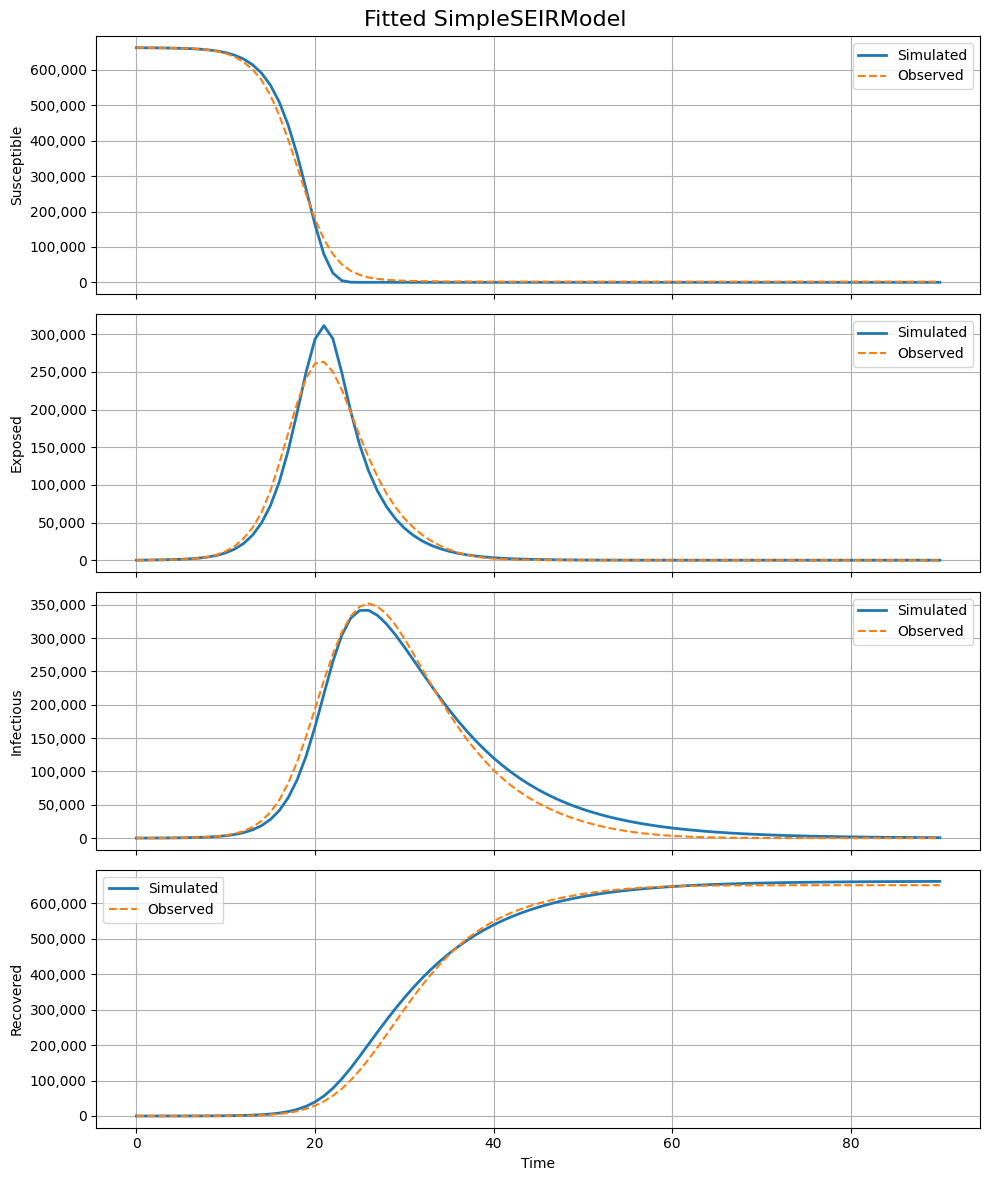

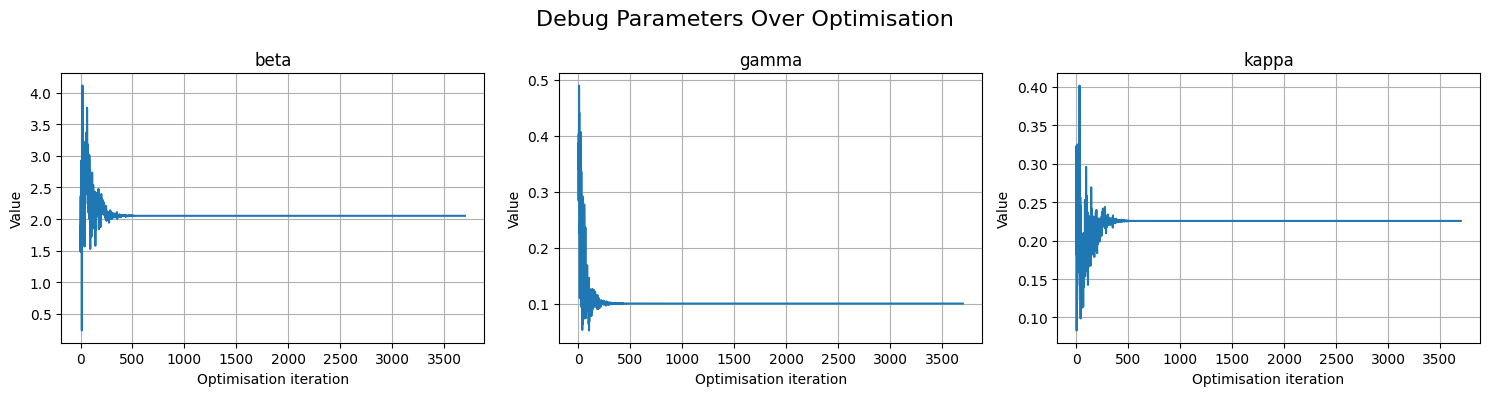


Parameter Comparison:
  Parameter  Estimated   True     Error
0      beta   2.051189  0.214  1.837189
1     kappa   0.225462  0.218  0.007462
2     gamma   0.100453  0.071  0.029453
3       R_t   4.203446  3.000  1.203446

=== Kolmogorov–Smirnov Test Summary ===
H₀: Simulated and observed data come from the SAME distribution.
H₁: Simulated and observed data come from DIFFERENT distributions.
Compartment  KS Statistic      p-value  Reject H₀ (α=0.05)
Susceptible      0.736264 3.179359e-24                True
    Exposed      0.285714 1.116530e-03                True
 Infectious      0.263736 3.426854e-03                True
  Recovered      0.307692 3.307766e-04                True


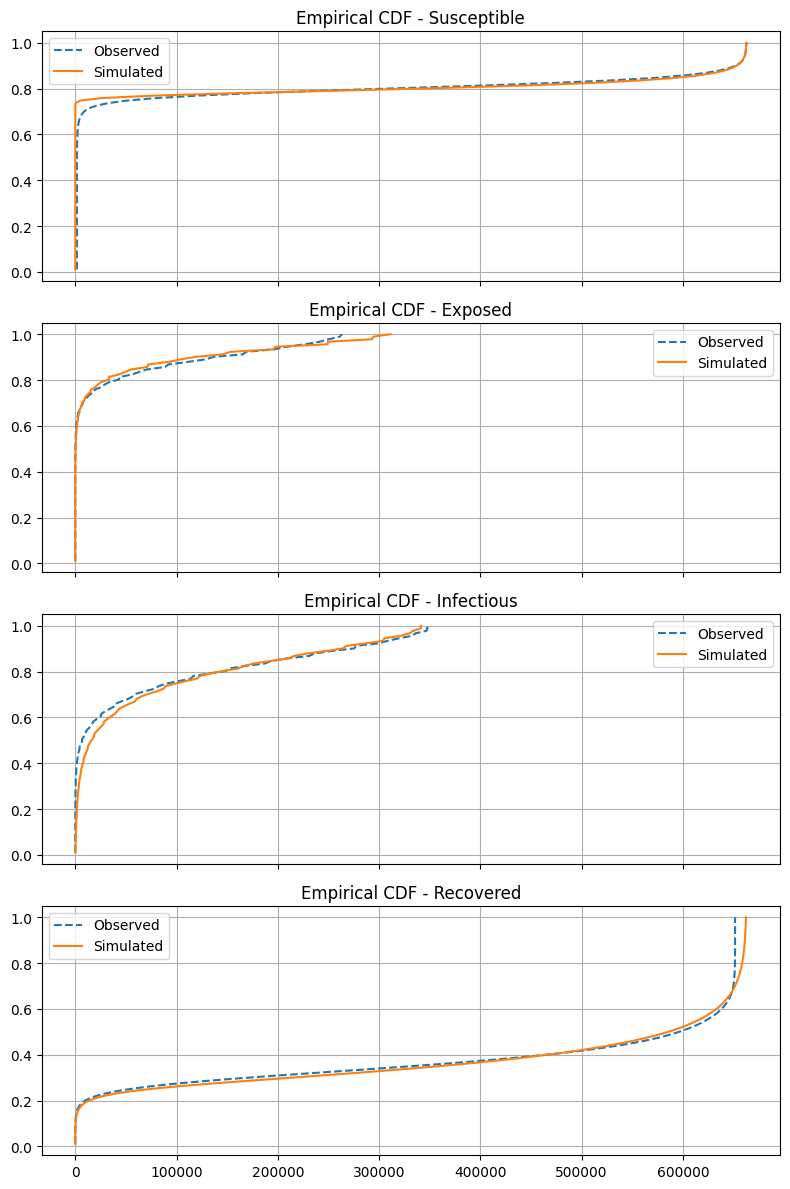

In [14]:

# Simple model
model = SimpleSEIRModel(initial_conditions)
result=model.fit_with_pints(times, observed, x0=[1.8, 1/5, 1/3])
model.compare_estimates_to_truth()

simulated=result["simulated"]

model.compare_estimates_to_truth()
model.ks_test_summary(observed=observed, simulated=simulated)

[662754, 0, 100, 0]
Maximising LogPDF
Using Exponential Natural Evolution Strategy (xNES)
Running in sequential mode.
Population size: 9
Iter. Eval. Best      Current   Time    
0     9     -1.52e+11 -1.52e+11   0:00.0
1     18    -1.51e+11 -1.51e+11   0:00.0
2     27    -1.37e+11 -1.37e+11   0:00.0
3     36    -1.37e+11 -1.41e+11   0:00.0
20    189   -1.34e+11 -1.57e+11   0:00.0
40    369   -7.36e+10 -7.36e+10   0:00.1
60    549   -2.93e+10 -4.53e+10   0:00.2
80    729   -2.75e+10 -5.28e+10   0:00.2
100   909   -2.1e+10  -2.94e+10   0:00.3
120   1089  -1.7e+10  -2.02e+10   0:00.4
140   1269  -1.5e+10  -1.54e+10   0:00.4
160   1449  -1.22e+10 -1.43e+10   0:00.5
180   1629  -1.15e+10 -1.18e+10   0:00.5
200   1809  -1.06e+10 -1.07e+10   0:00.6
220   1989  -1e+10    -1.03e+10   0:00.6
240   2169  -9.52e+09 -9.52e+09   0:00.7
260   2349  -9.32e+09 -9.39e+09   0:00.8
280   2529  -9.13e+09 -9.17e+09   0:00.8
300   2709  -9.02e+09 -9.02e+09   0:00.9
320   2889  -8.99e+09 -9.03e+09   0:01.0
34

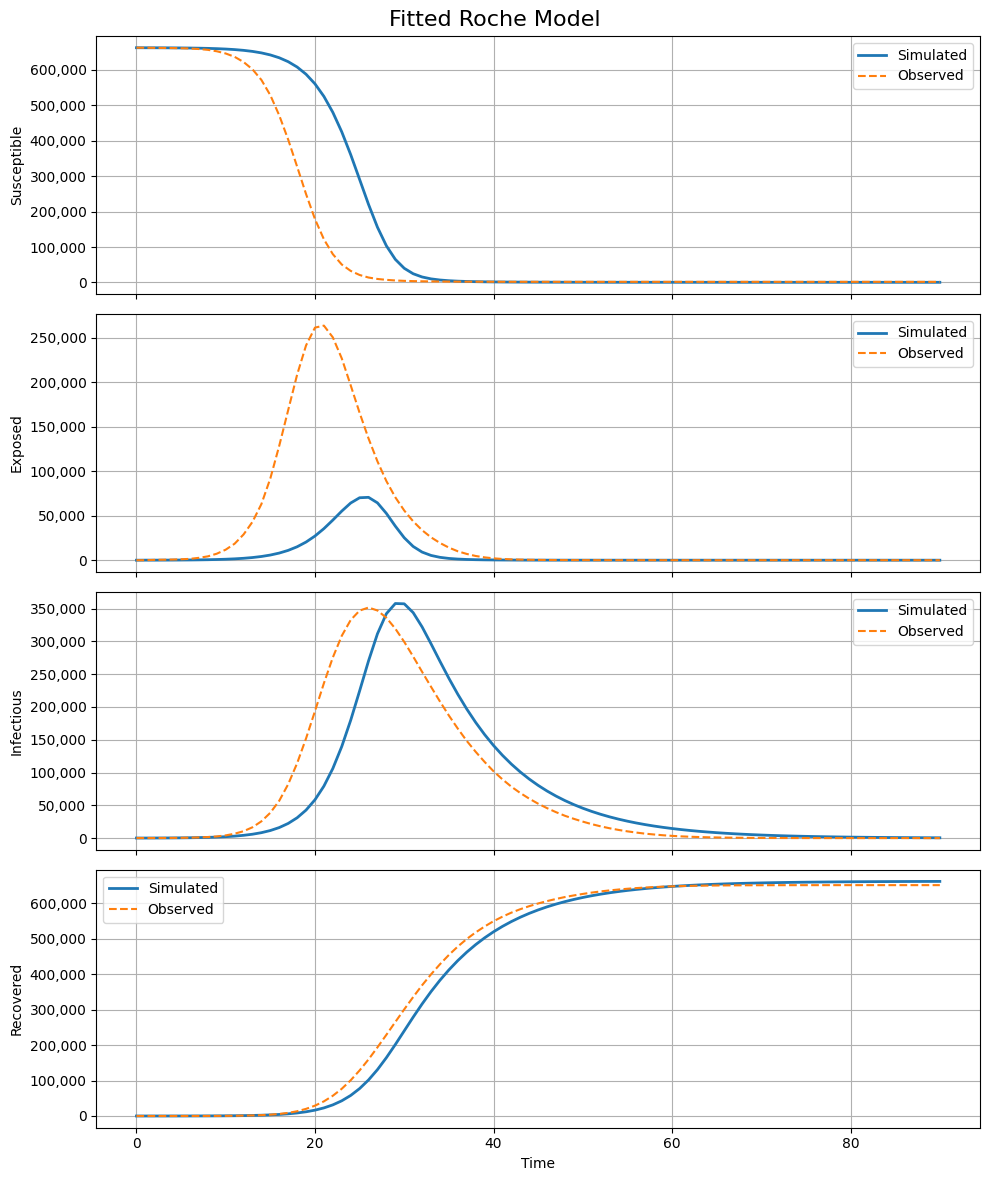

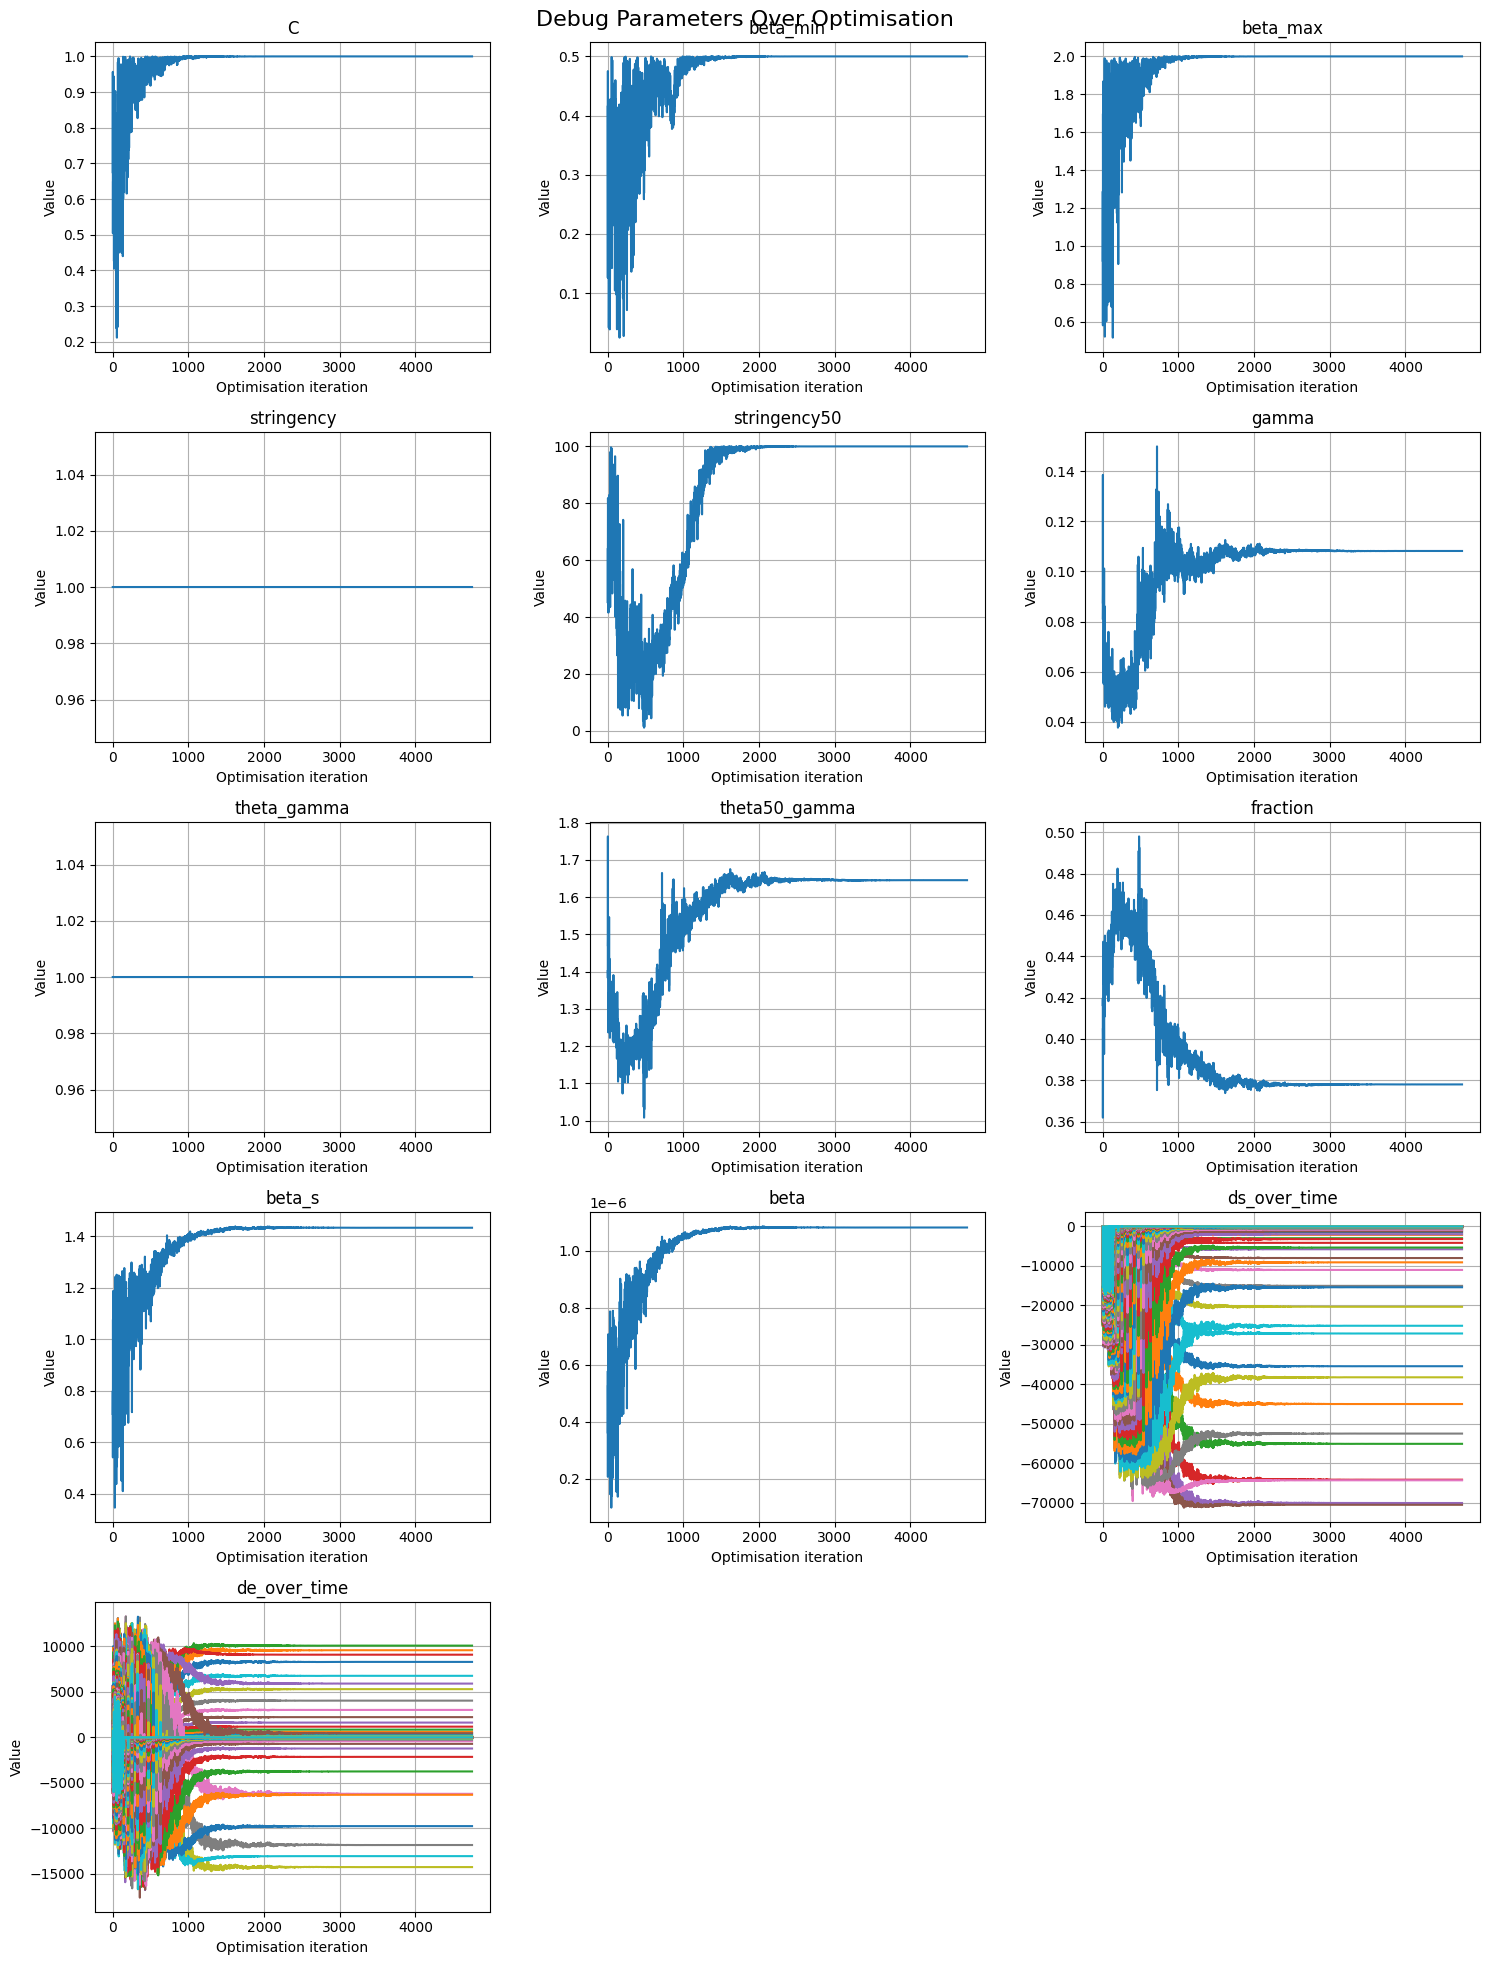


Parameter Comparison:
  Parameter  Estimated   True     Error
0      beta   0.000001  0.214  0.213999
1     kappa   1.000000  0.218  0.782000
2     gamma   0.108137  0.071  0.037137
3       R_t   1.824519  3.000  1.175481

=== Kolmogorov–Smirnov Test Summary ===
H₀: Simulated and observed data come from the SAME distribution.
H₁: Simulated and observed data come from DIFFERENT distributions.
Compartment  KS Statistic      p-value  Reject H₀ (α=0.05)
Susceptible      0.560440 1.662348e-13                True
    Exposed      0.285714 1.116530e-03                True
 Infectious      0.252747 5.795415e-03                True
  Recovered      0.307692 3.307766e-04                True


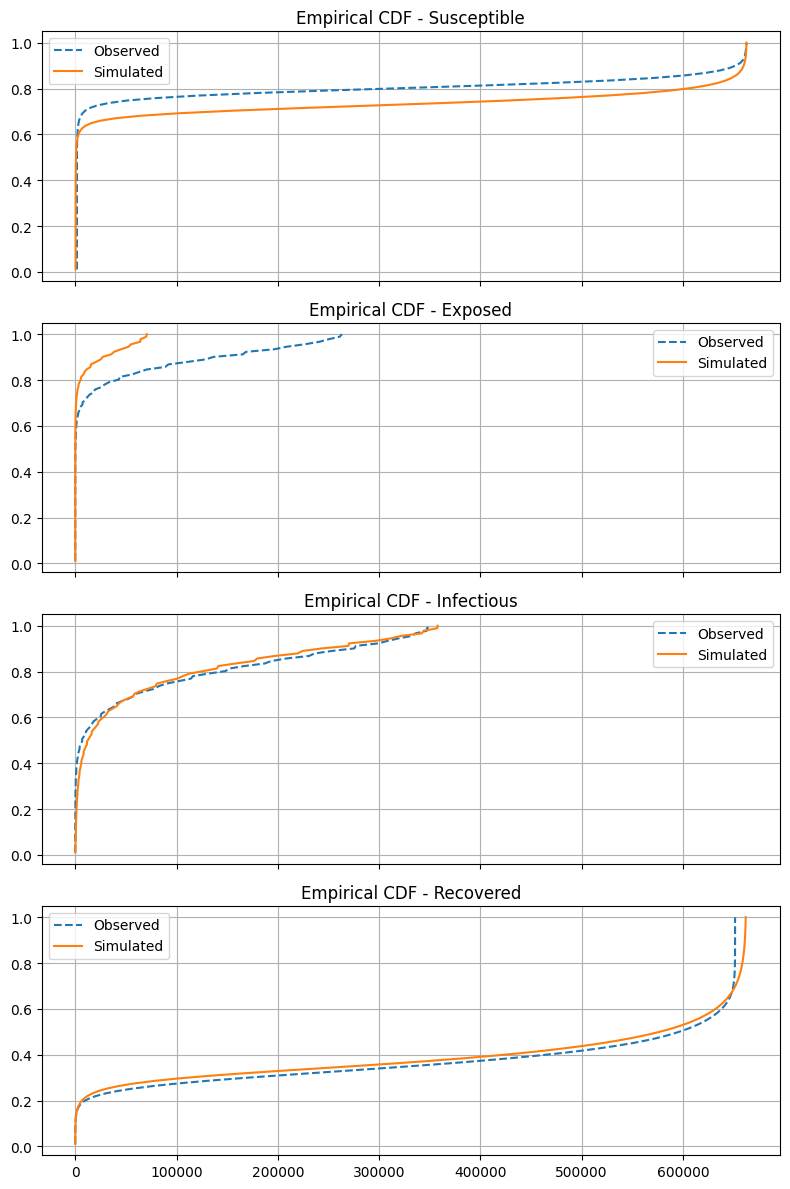

In [13]:
# Roche model
initial_conditions, observed = extract_initial_conditions_and_observed(filepath)
model = RocheModel(initial_conditions)

print(initial_conditions)
times = np.arange(91)
result = model.fit_with_pints(times, observed, x0 = [0.5, 0.5, 3.0, 50, 5, 5, 5])

simulated=result["simulated"]

model.compare_estimates_to_truth()
model.ks_test_summary(observed=observed, simulated=simulated)

c:\Users\kemuk\OneDrive - Nexus365\Documents\My_Vaults\DPhil\Year 1\Hilary\First Rotation\first_rotation\seir_models.py:422: RuntimeWarning: overflow encountered in scalar multiply
  dS = -beta * S * I
c:\Users\kemuk\OneDrive - Nexus365\Documents\My_Vaults\DPhil\Year 1\Hilary\First Rotation\first_rotation\seir_models.py:423: RuntimeWarning: overflow encountered in scalar multiply
  dE = beta * S * I- kappa * E
c:\Users\kemuk\OneDrive - Nexus365\Documents\My_Vaults\DPhil\Year 1\Hilary\First Rotation\first_rotation\seir_models.py:423: RuntimeWarning: invalid value encountered in scalar subtract
  dE = beta * S * I- kappa * E
c:\Users\kemuk\OneDrive - Nexus365\Documents\My_Vaults\DPhil\Year 1\Hilary\First Rotation\first_rotation\seir_models.py:431: RuntimeWarning: invalid value encountered in scalar add
  states[i] = [S + dt * dS, E + dt * dE, I + dt * dI, R + dt * dR]
c:\Users\kemuk\OneDrive - Nexus365\Documents\My_Vaults\DPhil\Year 1\Hilary\First Rotation\first_rotation\seir_models.py:1

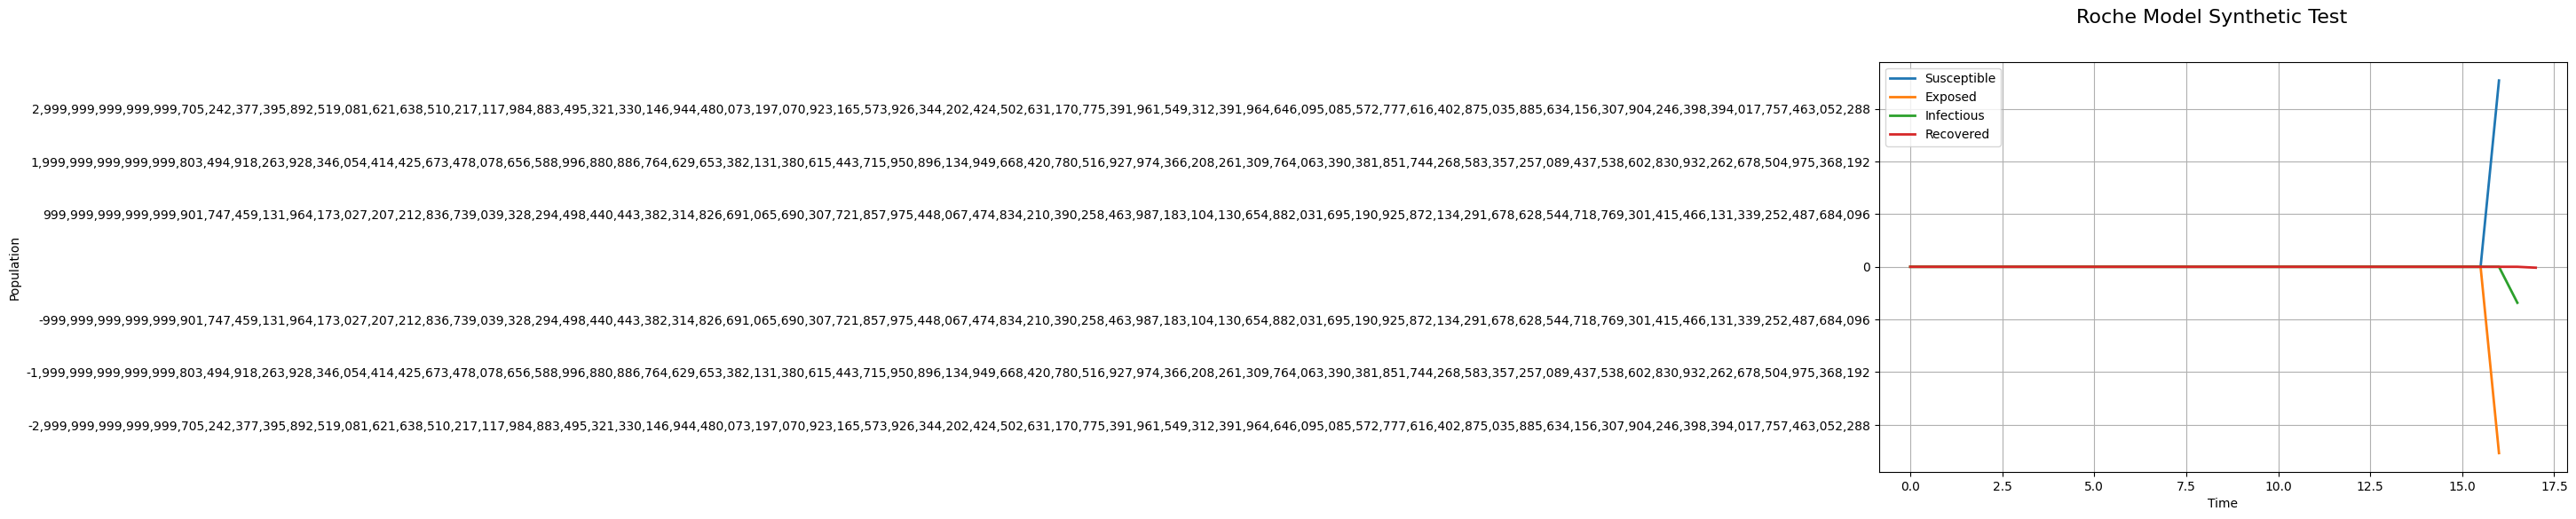

In [12]:
# Minimal test without loading data
initial_conditions = [599000, 0, 100, 0]

times = np.linspace(0,45,91)
parameters = [
    35,      # C: scaling factor (unitless)
    0.135,    # beta_min: minimum daily infection rate
    1.08,     # beta_max: maximum infection rate (symptomatic, no mitigation)
    60,     # max stringency (%)
    2.59,     # k: time to become infectious after exposure (days)
    10,     # k_s: time from infectiousness to symptom onset (days)
    10,      # k_ri: time to recover for asymptomatic/mild cases (days)
]


model = RocheModel(initial_conditions)
states = model.simulate(parameters, times)

model.plot(times, states, title="Roche Model Synthetic Test")

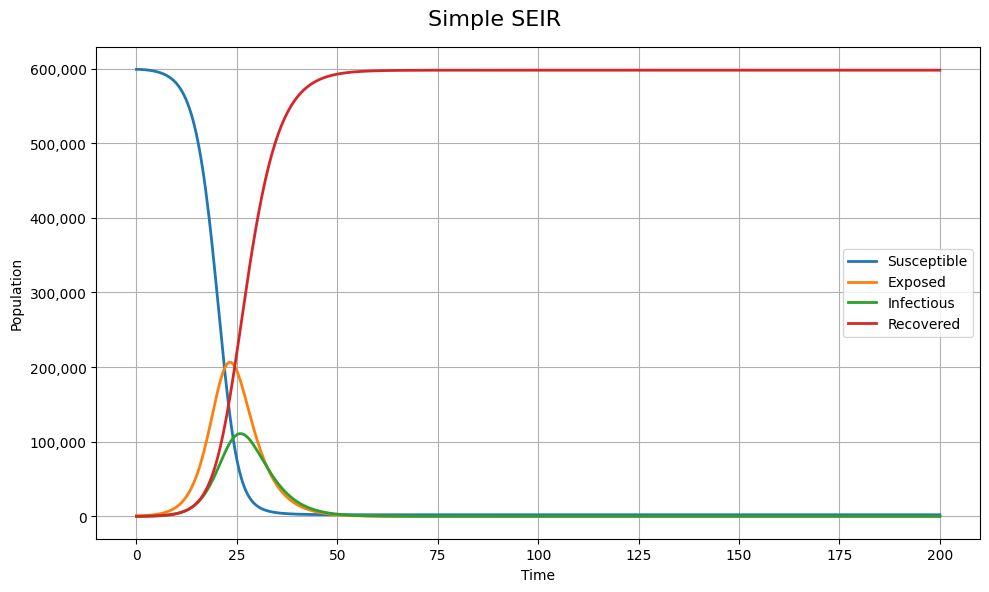

In [9]:
model = SimpleSEIRModel(initial_conditions=[599000, 1000, 0, 0])
params = [1.8, 1/5, 1/3]
times = np.linspace(0, 200, 500)
sim = model.simulate(params, times)
model.plot(times, sim, title="Simple SEIR")